## INSERTING LIBRARIES 

In [220]:
import pandas as pd
import yfinance as yf #Library to access a wide range of financial data, including stock prices, historical data, dividend information, and more
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

### Extracting Data

In [221]:
# extractiong data from 2010-01-01 to 2023-01-01
start_date = '2010-01-01'
end_date = '2023-01-01'

# Fetch the data from Yahoo Finance of TESLA inc.
df = yf.download('TSLA', start=start_date, end=end_date)

# Save the data to a CSV file
df.to_csv('tesla_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


In [223]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3145,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
3146,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
3147,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
3148,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


 ### ABOUT THE DATASET
 
 The dataset contains 3150 rows, which implies that it has information for 3150 different trading days.

* Open:   This is the opening price of Tesla's stock on a particular trading day. represents the price at which the first transaction occurred on that day. 
* High:   This is the highest price at which Tesla's stock traded during the same trading day.It shows the highest point the stock reached during the day
* Low:    This is the lowest price at which Tesla's stock traded during the same trading day.It represents the lowest point the stock reached during the day.
* Close:  This is the closing price of Tesla's stock on a particular trading day.It represents the price at which the last transaction occurred on that day.
* Adj Close: This is the adjusted closing price of Tesla's stock. It takes into account any corporate actions (like dividends or stock splits) that may have occurred over time,providing a more accurate reflection of the stock's value.
* Volume:  This represents the total number of shares of Tesla that were traded on a particular trading day.It indicates the level of market activity for that day.
* Date:   This is the date corresponding to the stock data.'''

## Data cleaning

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3150 non-null   datetime64[ns]
 1   Open       3150 non-null   float64       
 2   High       3150 non-null   float64       
 3   Low        3150 non-null   float64       
 4   Close      3150 non-null   float64       
 5   Adj Close  3150 non-null   float64       
 6   Volume     3150 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 172.4 KB


In [225]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3.150000e+03
mean,58.860577,60.176703,57.402961,58.807496,58.807496,9.359654e+07
std,95.658595,97.854579,93.175266,95.526397,95.526397,8.169856e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.976167,9.117500,8.765667,8.957666,8.957666,4.234658e+07
50%,16.229000,16.491000,15.945000,16.222334,16.222334,7.596600e+07
75%,24.622500,25.086666,24.158668,24.448000,24.448000,1.172978e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [226]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

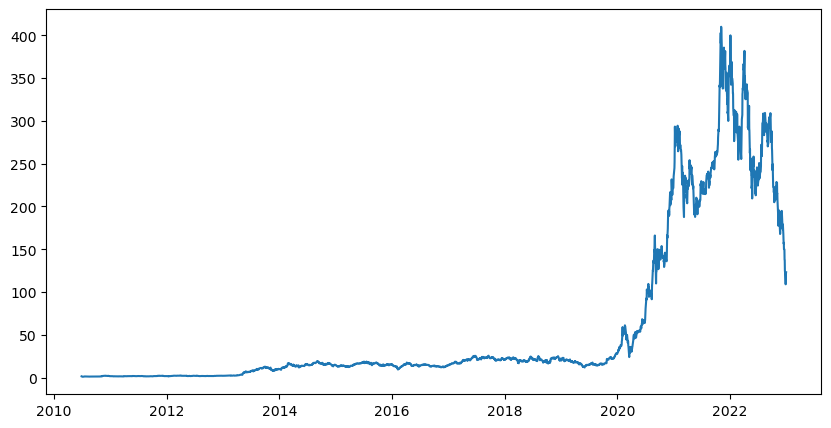

In [227]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Close'])

In [228]:
# Use 'Adj Close' for prediction
data = df['Adj Close'].values.reshape(-1, 1)

In [229]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [230]:
# Split data into training and testing sets

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [231]:
# Define a function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data)-seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

In [232]:
# Generate sequences
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Building the LSTM 

In [233]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_22 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [234]:
# training the model

model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
79/79 [==============================] - 24s 35ms/step - loss: 1.5147e-04
Epoch 2/10
79/79 [==============================] - 3s 36ms/step - loss: 2.1889e-05
Epoch 3/10
79/79 [==============================] - 3s 33ms/step - loss: 2.0253e-05
Epoch 4/10
79/79 [==============================] - 3s 37ms/step - loss: 2.1699e-05
Epoch 5/10
79/79 [==============================] - 3s 33ms/step - loss: 2.0042e-05
Epoch 6/10
79/79 [==============================] - 3s 33ms/step - loss: 2.0452e-05
Epoch 7/10
79/79 [==============================] - 3s 34ms/step - loss: 2.1073e-05
Epoch 8/10
79/79 [==============================] - 3s 35ms/step - loss: 1.9941e-05
Epoch 9/10
79/79 [==============================] - 3s 35ms/step - loss: 2.0035e-05
Epoch 10/10
79/79 [==============================] - 3s 40ms/step - loss: 1.7438e-05


In [235]:

train_loss = model.evaluate(X_train, y_train, verbose=1)
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')


20/20 [==============================] - 0s 14ms/step - loss: 0.0043
Training Loss: 0.0000
Testing Loss: 0.0043


In [236]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)


20/20 [==============================] - 0s 13ms/step


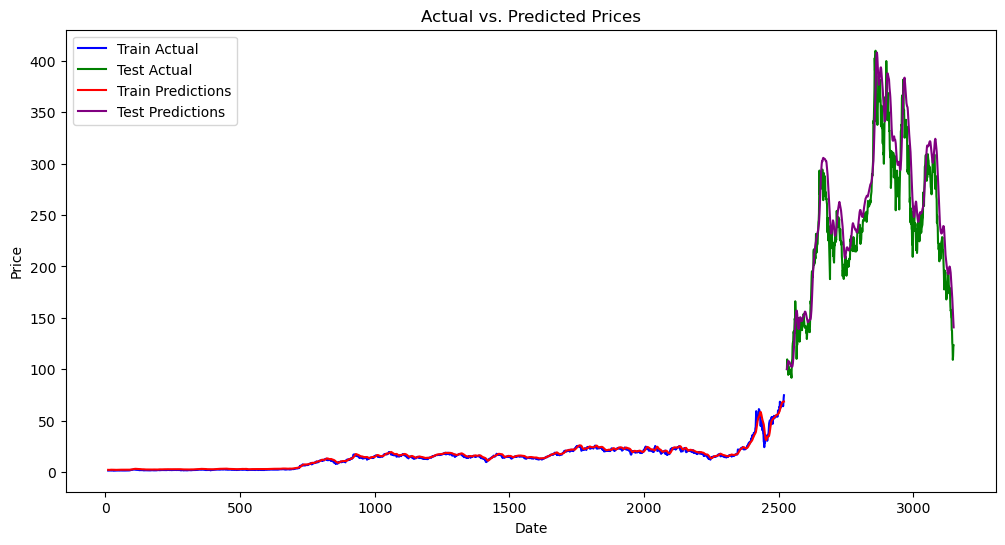

In [237]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[seq_length:train_size], df['Adj Close'][seq_length:train_size], label='Train Actual', color='blue')
plt.plot(df.index[train_size+seq_length:], df['Adj Close'][train_size+seq_length:], label='Test Actual', color='green')
plt.plot(df.index[seq_length:train_size], train_preds, label='Train Predictions', color='red')
plt.plot(df.index[train_size+seq_length:], test_preds, label='Test Predictions', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


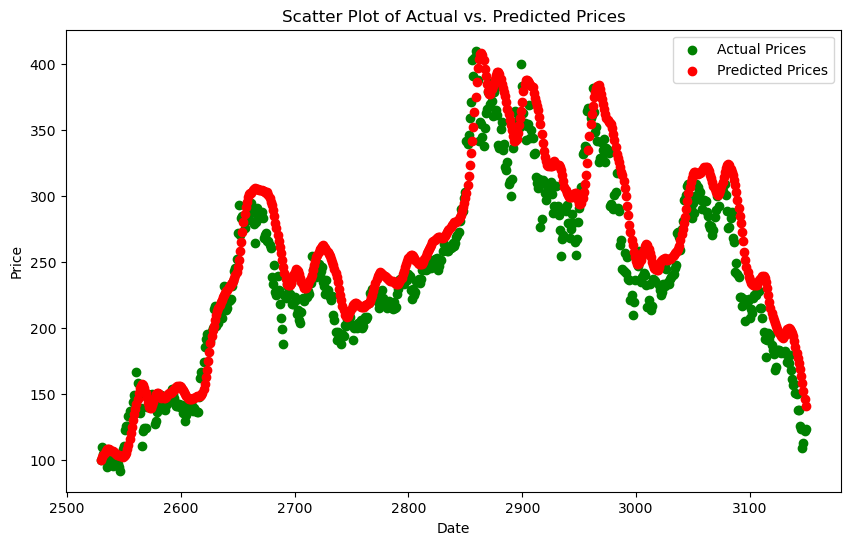

In [238]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index[train_size+seq_length:], df['Adj Close'][train_size+seq_length:], color='green', label='Actual Prices')
plt.scatter(df.index[train_size+seq_length:], test_preds, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Scatter Plot of Actual vs. Predicted Prices')
plt.legend()
plt.show()


## Model Evaluation

In [239]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df['Adj Close'][train_size+seq_length:], test_preds.flatten())
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 9.31%


### Predicting for 30 days

In [240]:
def generate_input_sequence(data, seq_length):
    sequence = data[-seq_length:].reshape(1, seq_length, 1)  # Reshape for model input
    return sequence


In [241]:
for _ in range(30):
    input_sequence = generate_input_sequence(scaled_data, seq_length)
    predicted_price = model.predict(input_sequence)
    predicted_price = scaler.inverse_transform(predicted_price)[0][0]
    predictions.append(predicted_price)
    scaled_data = np.append(scaled_data, [[predicted_price]], axis=0)


1/1 [==============================] - 0s 47ms/step


In [242]:
last_date = df.index[-1]
date_range = pd.date_range(last_date, periods=31, freq='B')[1:]


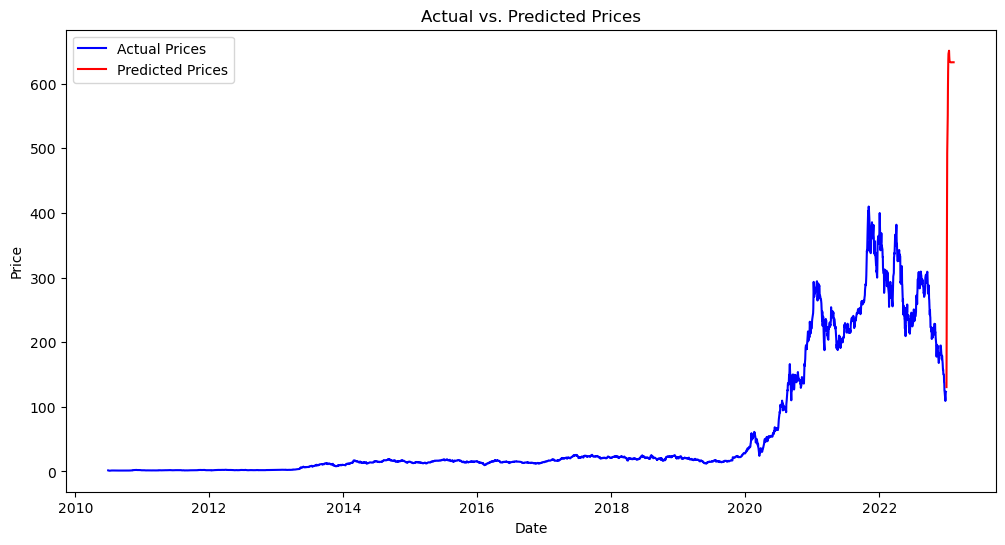

In [243]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted Price'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


In [244]:
from IPython.display import FileLink

# Save the predicted data to a CSV file
predicted_df.to_csv('predicted_tesla_stock_prices.csv', index=False)

# Creating a download link
FileLink('predicted_tesla_stock_prices.csv')


C:\Users\fahee\predicted_tesla_stock_prices.csv